In [1]:
import matplotlib.pyplot as plt
from qiskit.circuit import ParameterVector
import numpy as np
from qiskit.execute_function import execute
from qiskit import BasicAer
from qiskit import QuantumCircuit
import qiskit
from qiskit import Aer
# from qiskit.primitives import Sampler
from numpy.linalg import eig
from qiskit.opflow import Z, I, X, Y
from qiskit.quantum_info import Statevector, Operator, Pauli
from qiskit.circuit import Parameter

C:\Users\DELL\AppData\Local\Temp\ipykernel_6924\2017661958.py:11: DeprecationWarning: The ``qiskit.opflow`` module is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  from qiskit.opflow import Z, I, X, Y


In [2]:
# import model
from CoreVQEModified import Ising_hamiltonian
# import ansatz 
from CoreVQEModified import Customize_RealAmplidues, Customize_EfficientSU2
# import optimize
from CoreVQEModified import Customize_Finite_Difference, Customize_Parameter_Shift_Rule, Customize_Quantum_Natural_Gradient_Descent, Customize_SPSA, Customize_QNSPSA_PRS_blocking_fixrandom, Customize_QNSPSA_PRS_blocking, Customize_QN_SPSA_blocking, Customize_QNSPSA_SPSA_blocking, Customize_HESPSA_SPSA_blocking, Customize_HE_PRS
#import Measurement
from CoreVQEModified import Transverse_Ising_Measurement

In [3]:
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit.opflow.primitive_ops.pauli_sum_op import PauliSumOp
from qiskit.algorithms import NumPyEigensolver

exact_solver = NumPyEigensolver(k=1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6924\908257690.py:3: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms import NumPyEigensolver
C:\Users\DELL\AppData\Local\Temp\ipykernel_6924\908257690.py:5: DeprecationWarning: The class ``qiskit.algorithms.eigen_solvers.numpy_eigen_solver.NumPyEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.eigensolvers.NumPyEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  exact_solver = NumPyEigensolver(k=1)


In [4]:
print((exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 2))).eigenvalues.real[0])

-25.525138302048298


In [4]:
def open_file(optimize, eta, shots, interation, ansatz_name, num_qubits, reps, exchange_interaction, external_field, times):
    file_name_energy = f'{optimize} - LR {eta} - shots {shots} - interation {interation} - {ansatz_name}({num_qubits},{reps}) - J{exchange_interaction}h{external_field} - Energy - {times+1}'
    data_file_name_energy = open(f'{file_name_energy}.txt', 'r').readlines()[2:502]

    data_output = np.zeros(len(data_file_name_energy))

    for i in range(len(data_file_name_energy)):
        data_output[i] = data_file_name_energy[i].split(' ')[0]

    return (data_output)

# Figure 1

13 qubit

In [12]:
CoByla_ReAm_13_500_J1h2 = open_file(optimize='COBYLA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
FiniteDifference_ReAm_13_500_J1h2 = open_file(optimize='Customize_Finite_Difference', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=13, reps=1, exchange_interaction=1, external_field=2, times=0)
QNG_ReAm_13_500_J1h2 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=13, reps=1, exchange_interaction=1, external_field=2, times=0)
SPSA_ReAm_13_500_J1h2_1 = open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=13, reps=1, exchange_interaction=1, external_field=2, times=0)
SPSA_ReAm_13_500_J1h2_2 = open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=13, reps=1, exchange_interaction=1, external_field=2, times=1)
SPSA_ReAm_13_500_J1h2_3 = open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=13, reps=1, exchange_interaction=1, external_field=2, times=2)

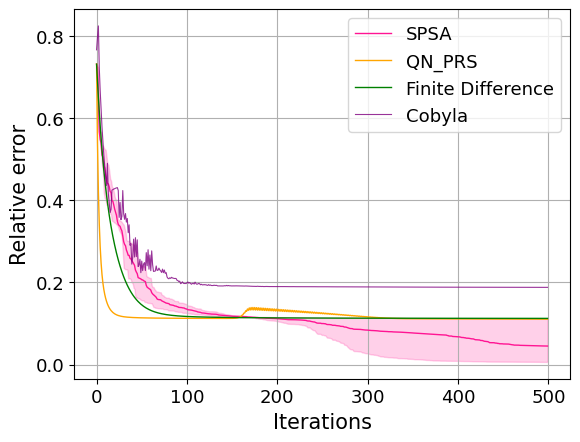

In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib widget

gs_energy_13_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(13, 1, 2))).eigenvalues.real[0]
interation = 500

fig, ax = plt.subplots()

x = np.arange(0, interation)

high_SPSA_ReAm_13_500_J1h2 = np.zeros(interation)
low_SPSA_ReAm_13_500_J1h2 = np.zeros(interation)

for i in range(interation):
    high_SPSA_ReAm_13_500_J1h2[i] = abs((max(SPSA_ReAm_13_500_J1h2_1[i], SPSA_ReAm_13_500_J1h2_2[i], SPSA_ReAm_13_500_J1h2_3[i]) - gs_energy_13_J1_h2)/gs_energy_13_J1_h2)
    low_SPSA_ReAm_13_500_J1h2[i] = abs((min(SPSA_ReAm_13_500_J1h2_1[i], SPSA_ReAm_13_500_J1h2_2[i], SPSA_ReAm_13_500_J1h2_3[i]) - gs_energy_13_J1_h2)/gs_energy_13_J1_h2)

# plt.figure(figsize=(8,5))
plt.plot(abs(((SPSA_ReAm_13_500_J1h2_1+SPSA_ReAm_13_500_J1h2_2+SPSA_ReAm_13_500_J1h2_3)/3-gs_energy_13_J1_h2)/gs_energy_13_J1_h2), color='deeppink', lw=1, label='SPSA')  
plt.fill_between(x, high_SPSA_ReAm_13_500_J1h2, low_SPSA_ReAm_13_500_J1h2, color='deeppink', alpha=.2)

plt.plot(abs((QNG_ReAm_13_500_J1h2-gs_energy_13_J1_h2)/gs_energy_13_J1_h2), color='orange', lw=1, label='QN_PRS')  
plt.plot(abs((FiniteDifference_ReAm_13_500_J1h2-gs_energy_13_J1_h2)/gs_energy_13_J1_h2), color='green', lw=1, label='Finite Difference')
plt.plot(abs((CoByla_ReAm_13_500_J1h2-gs_energy_13_J1_h2)/gs_energy_13_J1_h2), color='purple', lw=0.8, alpha=0.8, label='Cobyla')  
# plt.yscale('log')
plt.ylabel('Relative error', fontsize=15)
plt.xlabel('Iterations', fontsize=15)
# plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=1, label="Target: " + str(gs_energy))
# Exact ground state energy value
# plt.axhline(y=0.001, color="silver", ls="--", lw=1, label="Target: " + str(f'{0.001}'))
# plt.title('Quantum Natural Gradient Descent with various of learning rate')
plt.legend(fontsize=13)

plt.grid()
size_tick = 13
matplotlib.rc('xtick', labelsize=size_tick) 
matplotlib.rc('ytick', labelsize=size_tick) 
# plt.ylim((0,0.05))
plt.show()
fig.savefig('./Figure/Figure1-13-ReAm-.png', format='png', dpi=600)

12 qubit

In [5]:
CoByla_ReAm_12_500_J1h2 = open_file(optimize='COBYLA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
FiniteDifference_ReAm_12_500_J1h2 = open_file(optimize='Customize_Finite_Difference', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
QNG_ReAm_12_500_J1h2 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)

SPSA_ReAm_12_500_J1h2_1 = open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
SPSA_ReAm_12_500_J1h2_2 = open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=1)
SPSA_ReAm_12_500_J1h2_3 = open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=2)
SPSA_ReAm_12_500_J1h2_4 = open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=3)
SPSA_ReAm_12_500_J1h2_5 = open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=4)
SPSA_ReAm_12_500_J1h2_6 = open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=5)
SPSA_ReAm_12_500_J1h2_7 = open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=6)

QN_SPSA_ReAm_12_500_J1h2_1 = open_file(optimize='Customize_QN_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
QN_SPSA_ReAm_12_500_J1h2_2 = open_file(optimize='Customize_QN_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=1)
QN_SPSA_ReAm_12_500_J1h2_3 = open_file(optimize='Customize_QN_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=2)
QN_SPSA_ReAm_12_500_J1h2_4 = open_file(optimize='Customize_QN_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=3)
QN_SPSA_ReAm_12_500_J1h2_5 = open_file(optimize='Customize_QN_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=4)
QN_SPSA_ReAm_12_500_J1h2_6 = open_file(optimize='Customize_QN_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=5)
QN_SPSA_ReAm_12_500_J1h2_7 = open_file(optimize='Customize_QN_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=6)

QNSPSA_PRS_ReAm_12_500_J1h2_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
QNSPSA_PRS_ReAm_12_500_J1h2_2 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=1)
QNSPSA_PRS_ReAm_12_500_J1h2_3 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=2)
QNSPSA_PRS_ReAm_12_500_J1h2_4 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=3)
QNSPSA_PRS_ReAm_12_500_J1h2_5 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=4)
QNSPSA_PRS_ReAm_12_500_J1h2_6 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=5)
QNSPSA_PRS_ReAm_12_500_J1h2_7 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=6)

QNSPSA_SPSA_ReAm_12_500_J1h2_1 = open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
QNSPSA_SPSA_ReAm_12_500_J1h2_2 = open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=1)
QNSPSA_SPSA_ReAm_12_500_J1h2_3 = open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=2)
QNSPSA_SPSA_ReAm_12_500_J1h2_4 = open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=3)
QNSPSA_SPSA_ReAm_12_500_J1h2_5 = open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=4)
QNSPSA_SPSA_ReAm_12_500_J1h2_6 = open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=5)
QNSPSA_SPSA_ReAm_12_500_J1h2_7 = open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=6)

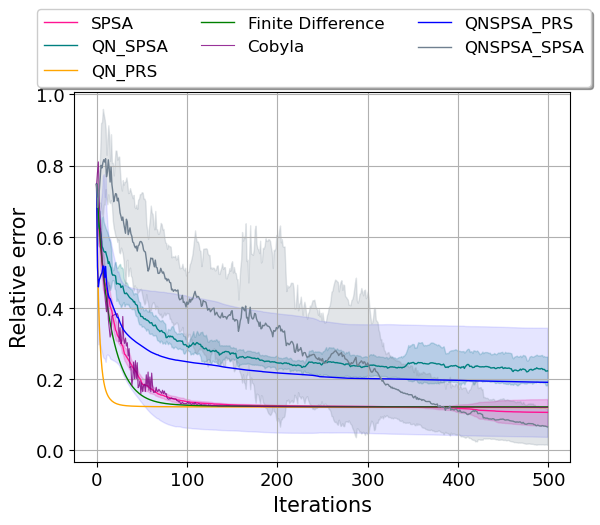

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib widget

gs_energy_12_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 2))).eigenvalues.real[0]
interation = 500

fig, ax = plt.subplots()

x = np.arange(0, interation)

mean_SPSA_ReAm_12_500_J1h2 = abs((np.mean(np.array([SPSA_ReAm_12_500_J1h2_1[0:interation], SPSA_ReAm_12_500_J1h2_2[0:interation], SPSA_ReAm_12_500_J1h2_3[0:interation], SPSA_ReAm_12_500_J1h2_4[0:interation], SPSA_ReAm_12_500_J1h2_5[0:interation], SPSA_ReAm_12_500_J1h2_6[0:interation], SPSA_ReAm_12_500_J1h2_7[0:interation]]), axis=0) -gs_energy_12_J1_h2)/gs_energy_12_J1_h2)
std_SPSA_ReAm_12_500_J1h2 = abs((np.std(np.array([SPSA_ReAm_12_500_J1h2_1[0:interation], SPSA_ReAm_12_500_J1h2_2[0:interation], SPSA_ReAm_12_500_J1h2_3[0:interation], SPSA_ReAm_12_500_J1h2_4[0:interation], SPSA_ReAm_12_500_J1h2_5[0:interation], SPSA_ReAm_12_500_J1h2_6[0:interation], SPSA_ReAm_12_500_J1h2_7[0:interation]]), axis=0) )/gs_energy_12_J1_h2)


# plt.figure(figsize=(8,5))
plt.plot(mean_SPSA_ReAm_12_500_J1h2, color='deeppink', lw=1, label='SPSA')  
plt.fill_between(x, mean_SPSA_ReAm_12_500_J1h2+std_SPSA_ReAm_12_500_J1h2, mean_SPSA_ReAm_12_500_J1h2-std_SPSA_ReAm_12_500_J1h2, color='deeppink', alpha=.2)


mean_QN_SPSA_ReAm_12_500_J1h2 = abs((np.mean(np.array([QN_SPSA_ReAm_12_500_J1h2_1[0:interation], QN_SPSA_ReAm_12_500_J1h2_2[0:interation], QN_SPSA_ReAm_12_500_J1h2_3[0:interation], QN_SPSA_ReAm_12_500_J1h2_4[0:interation], QN_SPSA_ReAm_12_500_J1h2_5[0:interation], QN_SPSA_ReAm_12_500_J1h2_6[0:interation],  QN_SPSA_ReAm_12_500_J1h2_7[0:interation]]), axis=0) -gs_energy_12_J1_h2)/gs_energy_12_J1_h2)
std_QN_SPSA_ReAm_12_500_J1h2 = abs((np.std(np.array([QN_SPSA_ReAm_12_500_J1h2_1[0:interation], QN_SPSA_ReAm_12_500_J1h2_2[0:interation], QN_SPSA_ReAm_12_500_J1h2_3[0:interation], QN_SPSA_ReAm_12_500_J1h2_4[0:interation], QN_SPSA_ReAm_12_500_J1h2_5[0:interation], QN_SPSA_ReAm_12_500_J1h2_6[0:interation],  QN_SPSA_ReAm_12_500_J1h2_7[0:interation]]), axis=0) )/gs_energy_12_J1_h2)


plt.plot(mean_QN_SPSA_ReAm_12_500_J1h2, color='teal', lw=1, label='QN_SPSA')  
plt.fill_between(x, mean_QN_SPSA_ReAm_12_500_J1h2+std_QN_SPSA_ReAm_12_500_J1h2, mean_QN_SPSA_ReAm_12_500_J1h2-std_QN_SPSA_ReAm_12_500_J1h2, color='teal', alpha=.2)


plt.plot(abs((QNG_ReAm_12_500_J1h2[0:interation]-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='orange', lw=1, label='QN_PRS')  
plt.plot(abs((FiniteDifference_ReAm_12_500_J1h2[0:interation]-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='green', lw=1, label='Finite Difference')
plt.plot(abs((CoByla_ReAm_12_500_J1h2[0:interation]-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='purple', lw=0.8, alpha=0.8, label='Cobyla')


mean_QNSPSA_PRS_ReAm_12_500_J1h2 = abs((np.mean(np.array([QNSPSA_PRS_ReAm_12_500_J1h2_1[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_2[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_3[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_4[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_5[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_6[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_7[0:interation]]), axis=0) -gs_energy_12_J1_h2)/gs_energy_12_J1_h2)
std_QNSPSA_PRS_ReAm_12_500_J1h2 = abs((np.std(np.array([QNSPSA_PRS_ReAm_12_500_J1h2_1[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_2[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_3[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_4[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_5[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_6[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_7[0:interation]]), axis=0) )/gs_energy_12_J1_h2)


plt.plot(mean_QNSPSA_PRS_ReAm_12_500_J1h2, color='blue', lw=1, label='QNSPSA_PRS')  
plt.fill_between(x, mean_QNSPSA_PRS_ReAm_12_500_J1h2+std_QNSPSA_PRS_ReAm_12_500_J1h2, mean_QNSPSA_PRS_ReAm_12_500_J1h2-std_QNSPSA_PRS_ReAm_12_500_J1h2, color='blue', alpha=.1)




mean_QNSPSA_SPSA_ReAm_12_500_J1h2 = abs((np.mean(np.array([QNSPSA_SPSA_ReAm_12_500_J1h2_1[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_2[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_3[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_4[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_5[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_6[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_7[0:interation]]), axis=0) -gs_energy_12_J1_h2)/gs_energy_12_J1_h2)
std_QNSPSA_SPSA_ReAm_12_500_J1h2 = abs((np.std(np.array([QNSPSA_SPSA_ReAm_12_500_J1h2_1[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_2[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_3[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_4[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_5[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_6[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_7[0:interation]]), axis=0) )/gs_energy_12_J1_h2)


plt.plot(mean_QNSPSA_SPSA_ReAm_12_500_J1h2, color='slategrey', lw=1, label='QNSPSA_SPSA')  
plt.fill_between(x, mean_QNSPSA_SPSA_ReAm_12_500_J1h2+std_QNSPSA_SPSA_ReAm_12_500_J1h2, mean_QNSPSA_SPSA_ReAm_12_500_J1h2-std_QNSPSA_SPSA_ReAm_12_500_J1h2, color='slategrey', alpha=.2)


# plt.yscale('log')
plt.ylabel('Relative error', fontsize=15)
plt.xlabel('Iterations', fontsize=15)
# plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=1, label="Target: " + str(gs_energy))
# Exact ground state energy value
# plt.axhline(y=0.001, color="silver", ls="--", lw=1, label="Target: " + str(f'{0.001}'))
# plt.title('Quantum Natural Gradient Descent with various of learning rate')
# plt.legend(fontsize=13)

size_tick = 13
matplotlib.rc('xtick', labelsize=size_tick) 
matplotlib.rc('ytick', labelsize=size_tick) 
# plt.
plt.grid()
# plt.ylim((0,0.05))
fig.legend(loc='upper center' ,bbox_to_anchor=(0.5, 1.07),  ncol=3, fancybox=True, shadow=True, fontsize=12)
fig.savefig('./Figure/Figure1-12-ReAm-.png', format='png', dpi=600, bbox_inches='tight')

# Figure 2

13 qubit

In [37]:
CoByla_ReAm_13_500_J1h2 = open_file(optimize='COBYLA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=13, reps=1, exchange_interaction=1, external_field=2, times=0)
QNG_ReAm_13_500_J1h2 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=13, reps=1, exchange_interaction=1, external_field=2, times=0)
CoByla_SU2_13_500_J1h2 = open_file(optimize='COBYLA', eta=0.01, shots="None", interation=500, ansatz_name="EffcientSU2", num_qubits=13, reps=1, exchange_interaction=1, external_field=2, times=0)
QNG_SU2_13_500_J1h2 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="EffcientSU2", num_qubits=13, reps=1, exchange_interaction=1, external_field=2, times=0)

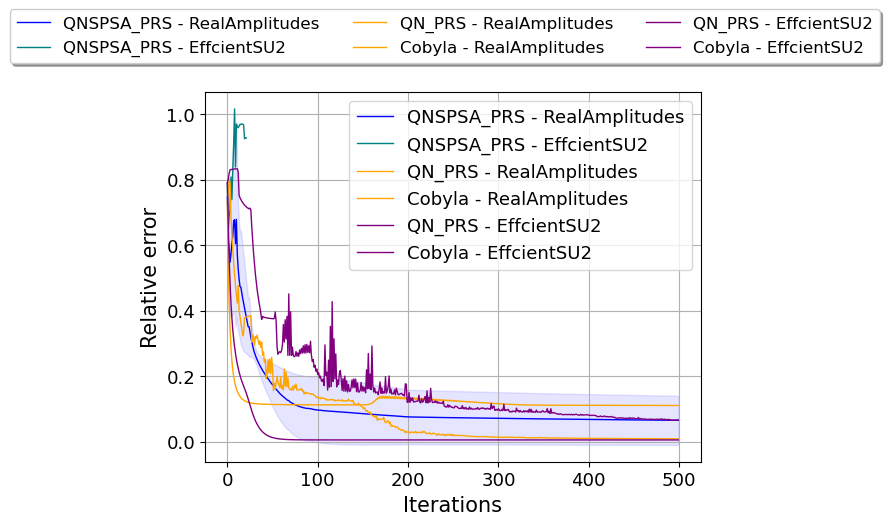

In [38]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib widget

gs_energy_13_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(13, 1, 2))).eigenvalues.real[0]
interation = 500

fig, ax = plt.subplots()

x = np.arange(0, interation)



plt.plot(abs((QNG_ReAm_13_500_J1h2-gs_energy_13_J1_h2)/gs_energy_13_J1_h2), color='orange', lw=1, label='QN_PRS - RealAmplitudes')  
plt.plot(abs((CoByla_ReAm_13_500_J1h2-gs_energy_13_J1_h2)/gs_energy_13_J1_h2), color='orange', lw=1, alpha=1, label='Cobyla - RealAmplitudes')  
plt.plot(abs((QNG_SU2_13_500_J1h2-gs_energy_13_J1_h2)/gs_energy_13_J1_h2), color='purple', lw=1, label='QN_PRS - EffcientSU2')  
plt.plot(abs((CoByla_SU2_13_500_J1h2-gs_energy_13_J1_h2)/gs_energy_13_J1_h2), color='purple', lw=1, alpha=1, label='Cobyla - EffcientSU2')  
# plt.yscale('log')
plt.ylabel('Relative error', fontsize=15)
plt.xlabel('Iterations', fontsize=15)
# plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=1, label="Target: " + str(gs_energy))
# Exact ground state energy value
# plt.axhline(y=0.001, color="silver", ls="--", lw=1, label="Target: " + str(f'{0.001}'))
# plt.title('Quantum Natural Gradient Descent with various of learning rate')
plt.legend(fontsize=13)

plt.grid()
size_tick = 13
matplotlib.rc('xtick', labelsize=size_tick) 
matplotlib.rc('ytick', labelsize=size_tick) 
# plt.ylim((0,0.05))
fig.legend(loc='upper center' ,bbox_to_anchor=(0.5, 1.07),  ncol=3, fancybox=True, shadow=True, fontsize=12)
fig.savefig('./Figure/Figure2 - 13 -Compared ReAm and EffSU2-.png', format='png', dpi=600)

12 qubit

In [11]:
CoByla_ReAm_12_500_J1h2 = open_file(optimize='COBYLA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
QNG_ReAm_12_500_J1h2 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
CoByla_SU2_12_500_J1h2 = open_file(optimize='COBYLA', eta=0.01, shots="None", interation=500, ansatz_name="EffcientSU2", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
QNG_SU2_12_500_J1h2 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="EffcientSU2", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)

QNSPSA_PRS_ReAm_12_500_J1h2_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
QNSPSA_PRS_ReAm_12_500_J1h2_2 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=1)
QNSPSA_PRS_ReAm_12_500_J1h2_3 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=2)
QNSPSA_PRS_ReAm_12_500_J1h2_4 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=3)
QNSPSA_PRS_ReAm_12_500_J1h2_5 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=4)
QNSPSA_PRS_ReAm_12_500_J1h2_6 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=5)
QNSPSA_PRS_ReAm_12_500_J1h2_7 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=6)

QNSPSA_PRS_SU2_12_500_J1h2_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="EffcientSU2", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
QNSPSA_PRS_SU2_12_500_J1h2_2 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="EffcientSU2", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=1)
QNSPSA_PRS_SU2_12_500_J1h2_3 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="EffcientSU2", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=2)
QNSPSA_PRS_SU2_12_500_J1h2_4 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="EffcientSU2", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=3)
QNSPSA_PRS_SU2_12_500_J1h2_5 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="EffcientSU2", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=4)

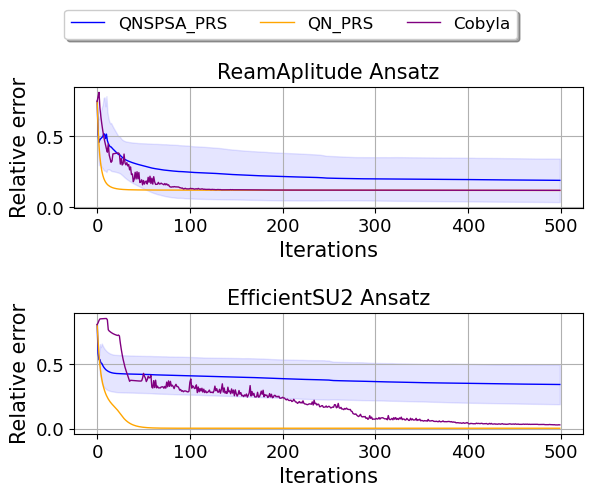

In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib widget

gs_energy_12_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 2))).eigenvalues.real[0]
interation = 500

fig, (ax0,ax1) = plt.subplots(2,1, gridspec_kw={'height_ratios': [3, 3]})

x = np.arange(0, interation)

mean_QNSPSA_PRS_ReAm_12_500_J1h2 = abs((np.mean(np.array([QNSPSA_PRS_ReAm_12_500_J1h2_1[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_2[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_3[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_4[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_5[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_6[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_7[0:interation]]), axis=0) -gs_energy_12_J1_h2)/gs_energy_12_J1_h2)
std_QNSPSA_PRS_ReAm_12_500_J1h2 = abs((np.std(np.array([QNSPSA_PRS_ReAm_12_500_J1h2_1[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_2[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_3[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_4[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_5[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_6[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_7[0:interation]]), axis=0) )/gs_energy_12_J1_h2)


ax0.plot(mean_QNSPSA_PRS_ReAm_12_500_J1h2, color='blue', lw=1, label='QNSPSA_PRS')  
ax0.fill_between(x, mean_QNSPSA_PRS_ReAm_12_500_J1h2+std_QNSPSA_PRS_ReAm_12_500_J1h2, mean_QNSPSA_PRS_ReAm_12_500_J1h2-std_QNSPSA_PRS_ReAm_12_500_J1h2, color='blue', alpha=.1)



ax0.plot(abs((QNG_ReAm_12_500_J1h2-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='orange', lw=1, label='QN_PRS')  
ax0.plot(abs((CoByla_ReAm_12_500_J1h2-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='purple', lw=1, alpha=1, label='Cobyla')  


mean_QNSPSA_PRS_SU2_12_500_J1h2 = abs((np.mean(np.array([QNSPSA_PRS_SU2_12_500_J1h2_1[0:interation], QNSPSA_PRS_SU2_12_500_J1h2_2[0:interation], QNSPSA_PRS_SU2_12_500_J1h2_3[0:interation], QNSPSA_PRS_SU2_12_500_J1h2_4[0:interation], QNSPSA_PRS_SU2_12_500_J1h2_5[0:interation]]), axis=0) -gs_energy_12_J1_h2)/gs_energy_12_J1_h2)
std_QNSPSA_PRS_SU2_12_500_J1h2 = abs((np.std(np.array([QNSPSA_PRS_SU2_12_500_J1h2_1[0:interation], QNSPSA_PRS_SU2_12_500_J1h2_2[0:interation], QNSPSA_PRS_SU2_12_500_J1h2_3[0:interation], QNSPSA_PRS_SU2_12_500_J1h2_4[0:interation], QNSPSA_PRS_SU2_12_500_J1h2_5[0:interation]]), axis=0) )/gs_energy_12_J1_h2)


ax1.plot(mean_QNSPSA_PRS_SU2_12_500_J1h2, color='blue', lw=1)  
ax1.fill_between(x, mean_QNSPSA_PRS_SU2_12_500_J1h2+std_QNSPSA_PRS_SU2_12_500_J1h2, mean_QNSPSA_PRS_SU2_12_500_J1h2-std_QNSPSA_PRS_SU2_12_500_J1h2, color='blue', alpha=.1)

ax1.plot(abs((QNG_SU2_12_500_J1h2-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='orange', lw=1) #, label='QN_PRS - EffcientSU2')  
ax1.plot(abs((CoByla_SU2_12_500_J1h2-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='purple', lw=1, alpha=1) #, label='Cobyla - EffcientSU2')  
# plt.yscale('log')
textlabel = 15
ax0.set_ylabel('Relative error', fontsize=textlabel)
ax0.set_xlabel('Iterations', fontsize=textlabel)
ax1.set_ylabel('Relative error', fontsize=textlabel)
ax1.set_xlabel('Iterations', fontsize=textlabel)
ax0.set_title('ReamAplitude Ansatz', fontsize=textlabel)
ax1.set_title('EfficientSU2 Ansatz', fontsize=textlabel)
# plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=1, label="Target: " + str(gs_energy))
# Exact ground state energy value
# plt.axhline(y=0.001, color="silver", ls="--", lw=1, label="Target: " + str(f'{0.001}'))
# plt.title('Quantum Natural Gradient Descent with various of learning rate')


ax0.grid()
ax1.grid()
size_tick = 13
matplotlib.rc('xtick', labelsize=size_tick) 
matplotlib.rc('ytick', labelsize=size_tick) 
# plt.ylim((0,0.05))
fig.tight_layout(pad=2.0)
fig.legend(loc='upper center' ,bbox_to_anchor=(0.5, 1.07),  ncol=3, fancybox=True, shadow=True, fontsize=12)
# plt.title("Figure 2: Compare Reamplitudes and EffcientSU2 ansatz", y = -1)
fig.savefig('./Figure/Figure2 - 12 -Compared ReAm and EffSU2-.png', format='png', dpi=600, bbox_inches='tight')

In [9]:
QNSPSA_PRS_ReAm_12_500_J1h0_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=0, times=0)
QNSPSA_PRS_ReAm_12_500_J1h0_2_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=0.2, times=0)
QNSPSA_PRS_ReAm_12_500_J1h0_4_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=0.4, times=0)
QNSPSA_PRS_ReAm_12_500_J1h0_6_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=0.6, times=0)
QNSPSA_PRS_ReAm_12_500_J1h0_8_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=0.8, times=0)
QNSPSA_PRS_ReAm_12_500_J1h1_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=1, times=0)
QNSPSA_PRS_ReAm_12_500_J1h1_2_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=1.2, times=0)
QNSPSA_PRS_ReAm_12_500_J1h1_4_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=1.4, times=0)
QNSPSA_PRS_ReAm_12_500_J1h1_6_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=1.6, times=0)
QNSPSA_PRS_ReAm_12_500_J1h1_8_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=1.8, times=0)
QNSPSA_PRS_ReAm_12_500_J1h2_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)

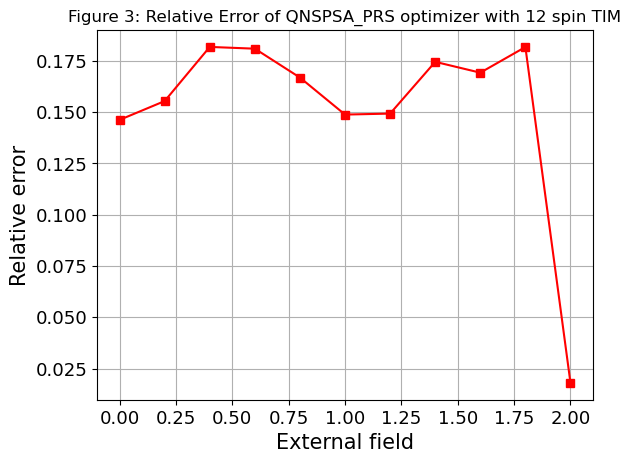

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib widget

fig, ax = plt.subplots()

gs_energy_12_J1_h0 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 0))).eigenvalues.real[0]
gs_energy_12_J1_h0_2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 0.2))).eigenvalues.real[0]
gs_energy_12_J1_h0_4 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 0.4))).eigenvalues.real[0]
gs_energy_12_J1_h0_6 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 0.6))).eigenvalues.real[0]
gs_energy_12_J1_h0_8 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 0.8))).eigenvalues.real[0]
gs_energy_12_J1_h1 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 1))).eigenvalues.real[0]
gs_energy_12_J1_h1_2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 1.2))).eigenvalues.real[0]
gs_energy_12_J1_h1_4 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 1.4))).eigenvalues.real[0]
gs_energy_12_J1_h1_6 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 1.6))).eigenvalues.real[0]
gs_energy_12_J1_h1_8 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 1.8))).eigenvalues.real[0]
gs_energy_12_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 2))).eigenvalues.real[0]


distance = np.linspace(0,2,11)

relative_error_energy_QNSPSA_PRS = np.array([abs((QNSPSA_PRS_ReAm_12_500_J1h0_1[-1]-gs_energy_12_J1_h0)/gs_energy_12_J1_h0), abs((QNSPSA_PRS_ReAm_12_500_J1h0_2_1[-1]-gs_energy_12_J1_h0_2)/gs_energy_12_J1_h0_2), abs((QNSPSA_PRS_ReAm_12_500_J1h0_4_1[-1]-gs_energy_12_J1_h0_4)/gs_energy_12_J1_h0_4), abs((QNSPSA_PRS_ReAm_12_500_J1h0_6_1[-1]-gs_energy_12_J1_h0_6)/gs_energy_12_J1_h0_6), abs((QNSPSA_PRS_ReAm_12_500_J1h0_8_1[-1]-gs_energy_12_J1_h0_8)/gs_energy_12_J1_h0_8), abs((QNSPSA_PRS_ReAm_12_500_J1h1_1[-1] -gs_energy_12_J1_h1)/gs_energy_12_J1_h1), abs((QNSPSA_PRS_ReAm_12_500_J1h1_2_1[-1]-gs_energy_12_J1_h1_2)/gs_energy_12_J1_h1_2), abs((QNSPSA_PRS_ReAm_12_500_J1h1_4_1[-1]-gs_energy_12_J1_h1_4)/gs_energy_12_J1_h1_4), abs((QNSPSA_PRS_ReAm_12_500_J1h1_6_1[-1]-gs_energy_12_J1_h1_6)/gs_energy_12_J1_h1_6), abs((QNSPSA_PRS_ReAm_12_500_J1h1_8_1[-1]-gs_energy_12_J1_h1_8)/gs_energy_12_J1_h1_8), abs((QNSPSA_PRS_ReAm_12_500_J1h2_1[-1]-gs_energy_12_J1_h2)/gs_energy_12_J1_h2)])

plt.plot(distance, relative_error_energy_QNSPSA_PRS,  marker='s', color='red')
plt.ylabel('Relative error', fontsize=15)
plt.xlabel('External field', fontsize=15)
# plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=1, label="Target: " + str(gs_energy))
# Exact ground state energy value
# plt.axhline(y=0.001, color="silver", ls="--", lw=1, label="Target: " + str(f'{0.001}'))
# plt.title('Quantum Natural Gradient Descent with various of learning rate')
# plt.legend(fontsize=13)

size_tick = 13
matplotlib.rc('xtick', labelsize=size_tick) 
matplotlib.rc('ytick', labelsize=size_tick) 
# plt.
plt.grid()
# plt.ylim((0,0.05))
# plt.legend(loc='upper center' ,bbox_to_anchor=(0.5, 1.07),  ncol=3, fancybox=True, shadow=True, fontsize=12)
plt.title('Figure 3: Relative Error of QNSPSA_PRS optimizer with 12 spin TIM')
fig.savefig('./Figure/Figure3-12-ReAm-QNSPSA_PRS.png', format='png', dpi=600, bbox_inches='tight')

In [19]:
QNSPSA_PRS_ReAm_3_500_J1h2_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=3, reps=1, exchange_interaction=1, external_field=2, times=0)
QNSPSA_PRS_ReAm_4_500_J1h2_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=4, reps=1, exchange_interaction=1, external_field=2, times=0)
QNSPSA_PRS_ReAm_5_500_J1h2_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=5, reps=1, exchange_interaction=1, external_field=2, times=0)
QNSPSA_PRS_ReAm_6_500_J1h2_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=6, reps=1, exchange_interaction=1, external_field=2, times=0)
QNSPSA_PRS_ReAm_7_500_J1h2_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=7, reps=1, exchange_interaction=1, external_field=2, times=0)
QNSPSA_PRS_ReAm_8_500_J1h2_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=8, reps=1, exchange_interaction=1, external_field=2, times=0)
QNSPSA_PRS_ReAm_9_500_J1h2_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=9, reps=1, exchange_interaction=1, external_field=2, times=0)
QNSPSA_PRS_ReAm_10_500_J1h2_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=10, reps=1, exchange_interaction=1, external_field=2, times=0)
QNSPSA_PRS_ReAm_11_500_J1h2_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=11, reps=1, exchange_interaction=1, external_field=2, times=0)
QNSPSA_PRS_ReAm_12_500_J1h2_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)

In [24]:
distance = np.linspace(3,12,10)
print(distance)

[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


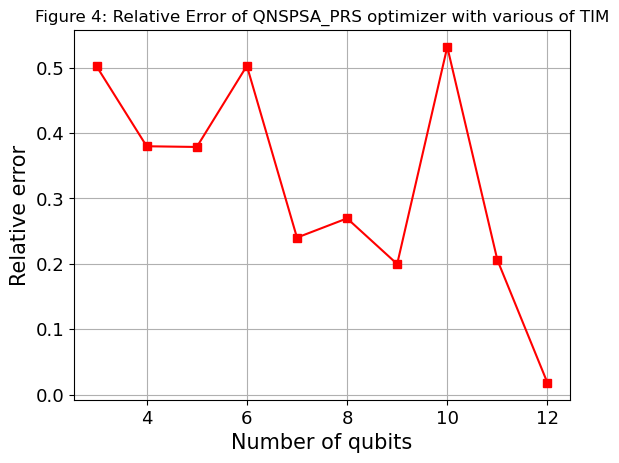

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib widget

fig, ax = plt.subplots()

gs_energy_3_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(3, 1, 2))).eigenvalues.real[0]
gs_energy_4_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(4, 1, 2))).eigenvalues.real[0]
gs_energy_5_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(5, 1, 2))).eigenvalues.real[0]
gs_energy_6_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(6, 1, 2))).eigenvalues.real[0]
gs_energy_7_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(7, 1, 2))).eigenvalues.real[0]
gs_energy_8_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(8, 1, 2))).eigenvalues.real[0]
gs_energy_9_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(9, 1, 2))).eigenvalues.real[0]
gs_energy_10_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(10, 1, 2))).eigenvalues.real[0]
gs_energy_11_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(11, 1, 2))).eigenvalues.real[0]
gs_energy_12_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 2))).eigenvalues.real[0]


distance = np.linspace(3,12,10)

relative_error_energy_QNSPSA_PRS = np.array([abs((QNSPSA_PRS_ReAm_3_500_J1h2_1[-1]-gs_energy_3_J1_h2)/gs_energy_3_J1_h2), abs((QNSPSA_PRS_ReAm_4_500_J1h2_1[-1]-gs_energy_4_J1_h2)/gs_energy_4_J1_h2), abs((QNSPSA_PRS_ReAm_5_500_J1h2_1[-1]-gs_energy_5_J1_h2)/gs_energy_5_J1_h2), abs((QNSPSA_PRS_ReAm_6_500_J1h2_1[-1]-gs_energy_6_J1_h2)/gs_energy_6_J1_h2), abs((QNSPSA_PRS_ReAm_7_500_J1h2_1[-1]-gs_energy_7_J1_h2)/gs_energy_7_J1_h2), abs((QNSPSA_PRS_ReAm_8_500_J1h2_1[-1]-gs_energy_8_J1_h2)/gs_energy_8_J1_h2), abs((QNSPSA_PRS_ReAm_9_500_J1h2_1[-1]-gs_energy_9_J1_h2)/gs_energy_9_J1_h2), abs((QNSPSA_PRS_ReAm_10_500_J1h2_1[-1]-gs_energy_10_J1_h2)/gs_energy_10_J1_h2), abs((QNSPSA_PRS_ReAm_11_500_J1h2_1[-1]-gs_energy_11_J1_h2)/gs_energy_11_J1_h2), abs((QNSPSA_PRS_ReAm_12_500_J1h2_1[-1]-gs_energy_12_J1_h2)/gs_energy_12_J1_h2)])

plt.plot(distance, relative_error_energy_QNSPSA_PRS,  marker='s', color='red')
plt.ylabel('Relative error', fontsize=15)
plt.xlabel('Number of qubits', fontsize=15)
# plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=1, label="Target: " + str(gs_energy))
# Exact ground state energy value
# plt.axhline(y=0.001, color="silver", ls="--", lw=1, label="Target: " + str(f'{0.001}'))
# plt.title('Quantum Natural Gradient Descent with various of learning rate')
# plt.legend(fontsize=13)

size_tick = 13
matplotlib.rc('xtick', labelsize=size_tick) 
matplotlib.rc('ytick', labelsize=size_tick) 
# plt.
plt.grid()
# plt.ylim((0,0.05))
# plt.legend(loc='upper center' ,bbox_to_anchor=(0.5, 1.07),  ncol=3, fancybox=True, shadow=True, fontsize=12)
plt.title('Figure 4: Relative Error of QNSPSA_PRS optimizer with various of TIM')
fig.savefig('./Figure/Figure4-ReAm-QNSPSA_PRS_Qubit.png', format='png', dpi=600, bbox_inches='tight')

In [57]:
from qiskit import QuantumCircuit
def SwapTest(circ1, circ2):
    """
    circ1: for the parameter circuit of VQD
    circ2: for the parameter circuit of VQE, this circuit have the infromation from the VQE running, or the k-1 of VQD running
    shots: number of shots
    backend: backend for running
    """

    # Perpare the circuit
    num_qubits = circ1.num_qubits
    circ = QuantumCircuit(2*num_qubits+1) # Plus one for the ancilla qubit

    circ = circ.compose(circ1, [i for i in range(1, num_qubits+1)])
    circ = circ.compose(circ2, [i for i in range(num_qubits+1, num_qubits*2+1)])
    circ.barrier()

    circ.h(0)

    for i in range(1, num_qubits+1):
        circ.cswap(0, i, i+num_qubits)

    circ.h(0)  

    overlap_value = 1 - 2*Statevector(circ).probabilities([0])[1]
    
    return overlap_value, circ

In [70]:
circuit1 = QuantumCircuit(12)
circuit1.h(_ for _ in range(12))
circuit1.cx(0, range(1,11))
circuit2 = QuantumCircuit(12)
circuit2.x(_ for _ in range(3,11))
circuit2.cx(11,range(3,10))

In [71]:
backend = Aer.get_backend('statevector_simulator')
job1 = backend.run(circuit1)
vector1 = np.matrix(job1.result().get_statevector())
job2 = backend.run(circuit2)
vector2 = np.matrix(job2.result().get_statevector())
print(vector1)
print(vector2)

[[0.015625+0.j 0.015625+0.j 0.015625+0.j ... 0.015625+0.j 0.015625+0.j
  0.015625+0.j]]
[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


In [78]:
(np.array(vector1)[0] @ np.array(vector2)[0])**2

(0.0002441406250000001+0j)

In [75]:
value, circuit = SwapTest(circuit1, circuit2)
print(value)


0.000244140625000111


In [56]:
circuit.draw()
circuit1.draw()
# circuit2.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘